In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ludwig D., Jones D.D., Holling C.S. (1978) Qualitative Analysis of Insect Outbreak Systems: The Spruce Budworm and Forest. The Journal of Animal Ecology 47/1: 315-332 (see also: Strogatz, Nonlinear Dynamics and Chaos. p.73).

A spruce budworm population grows logistically and is predated by birds:

(1)  Ntdt=RN(1−NK)−BN2A2+N2 
Predation is expressed by the  BN2A2+N2  term. When budworms are scarce, there is almost no predation. Birds feed on other sources. Once the population exceeds a certain level  N=A , predation turns on sharply and then saturates (birds are eating as fast as they can).

A feature of predators is that their effect saturates at high prey densities (e.g. due to territorial behavior). This means there is an upper limit to the rate of budworm mortality due to predation. Impact does not increase limitlessly with increasing budworm density. The predation term approaches an upper limit  B  as  N→∞ .

There is also a decrease in the effectiveness of predation at low budworm densities, which can be seen as an effect of learning. Birds have a variety of alternative foods, and when one of them is scarce it may be encountered only incidentally. As the prey becomes more common, however, the birds begin to associate reward with it and they begin to search selectively for it. Thus predation may vanish quadratically as  N→0 . Showing saturation at level  B  and vanishing like  N2  thus can be expressed through  BN2A2+N2 , with  A  determining the scale of budworm densities at which saturation begins to take place. The predation term thus corresponds to a Type-III S-shaped functional response.

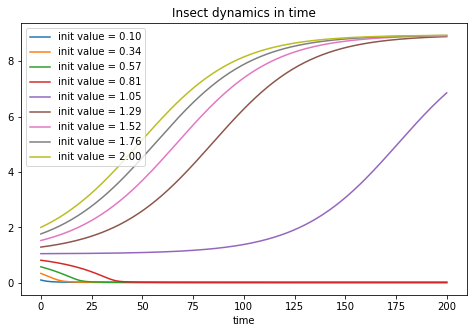

In [2]:
dt = 0.1
A = 0.1                 
B = 0.5

R = 0.53   # growthrate
K = 10.    # carrying capacity

#plot
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.1, 2, 9):
    N = [j]
    #compute
    for i in range(200):
        N.append(N[i] + (R * N[i] * (1 - N[i]/K) - (B * N[i]**2)/(A**2 + N[i]**2)) * dt)
        
    plt.plot(N, label = 'init value = %0.2f' %j)

plt.title("Insect dynamics in time")
plt.xlabel("time")
plt.legend(loc = 'best')

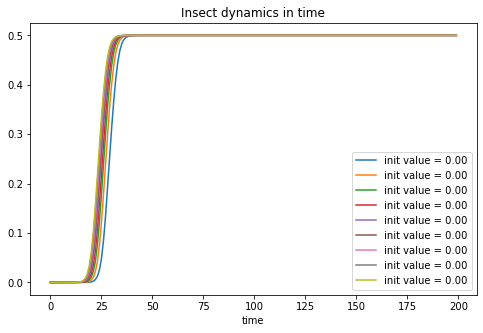

In [45]:
dt = 0.1
A = 0.1                 
B = 0.5

R = 0.53   # growthrate
K = 10.    # carrying capacity

#plot
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.000001, 0.00001, 9):
    N = [j]
    predation_N=[]
    #compute
    for i in range(200):
        predation_N.append((B * N[i]**2)/(A**2 + N[i]**2))
        N.append(N[i] + (R * N[i] * (1 - N[i]/K) - predation_N[-1] * dt))
    plt.plot(predation_N, label = 'init value = %0.2f' %j)

plt.title("Insect predation dynamics in time")
plt.xlabel("time")
plt.legend(loc = 'best')


Analysis of the model
First step: find a dimensionless formulation:
The model has four parameters, of which  A  and  K  have the same dimension as  N , the insect population. So either  NA  or  NK  can serve as dimensionless population level.

Divide (1) by  B  and then let  x=NA  which yields

(2)  ABdxdt=RBAx(1−AxK)−x21+x2 
Introduce a dimensionless time  τ  and dimensionless groups  r  and  k  as follows

τ=BtA,r=RAB,k=KA 
Then (2) becomes

(3)  dxdt=rx(1−xk)−x21+x2 
Find Fixed points
As in logistic growth in general, one trivial fixed point is  xequ=0 . If predation is extremly weak, the budworm population will grow from nearly each initial size.

The other fixed points can be found by the solution of

rx(1−xk)=x21+x2 
which divided by  x  yields

(4)  r(1−xk)=x1+x2 
This can be solved graphically by plotting both sides of the equation into one plot.

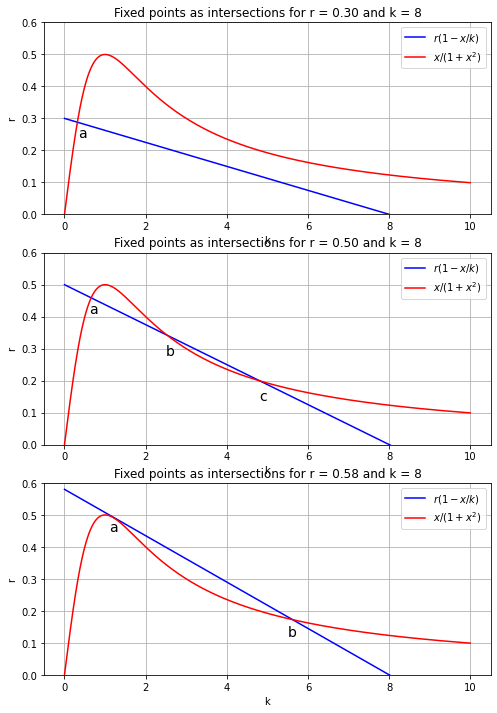

In [3]:
#load necessary python-packages:
import numpy as np
import matplotlib.pyplot as plt

#define figure properties for upcoming plots:
fig = plt.figure(figsize=(8,12))


X = np.linspace(0,10,1000)

R = [0.3, 0.5, 0.58]

for n, r in enumerate(R):
    y1 = []
    y2 = []
    fp = []
    k = 8.
    
    for x in X:
        y1.append(r*(1-float(x)/k))
        y2.append(x/(1+float(x)**2))

    plt.subplot(3, 1, n + 1)
    plt.plot(X, y1, 'b-', label='$r(1-x/k)$')
    plt.plot(X, y2, 'r-', label = '$x/(1+x^2)$')
    if n == 0:
        plt.text(0.33, 0.24, 'a', fontsize=14)
    if n == 1:
        plt.text(0.61, 0.41, 'a', fontsize=14)
        plt.text(2.5, 0.28, 'b', fontsize=14)
        plt.text(4.8, 0.14, 'c', fontsize=14)
    if n == 2:
        plt.text(1.1, 0.45, 'a', fontsize=14)
        plt.text(5.5, 0.12, 'b', fontsize=14)

    plt.ylim(0, 0.6)
    plt.xlabel('k')
    plt.ylabel('r')
    plt.title('Fixed points as intersections for r = %0.2f and k = %0.f' %(r, k))
    plt.grid()
    plt.legend(loc='best')


As can be seen, the system can have one or three, or two fixed points.

If the line intersects the curve tangentially, this indicates a bifurcation, a point where the stability of the fixed point changes either from stable to unstable or from unstable to stable. The following shows two possibilities of such tangential intersections, the points  a  and  b .

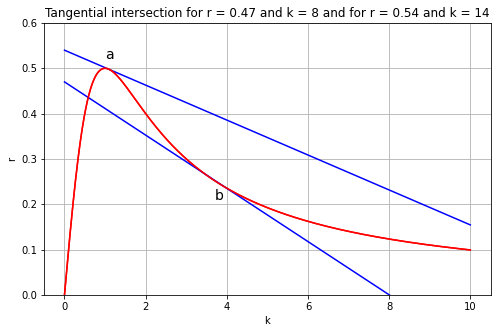

In [4]:
fig = plt.figure(figsize=(8,5))
X = np.linspace(0,10,1000)

RK = ((0.54, 14.), (0.47, 8.))

for (r, k) in RK:
    y1 = []
    y2 = []
    for x in X:
        y1.append(r*(1-float(x)/k))
        y2.append(x/(1+float(x)**2))

    plt.plot(X, y1, 'b-')
    plt.plot(X, y2, 'r-')
plt.text(1., 0.52, 'a', fontsize=14)
plt.text(3.7, 0.21, 'b', fontsize=14)
plt.ylim(0, 0.6)
plt.xlabel('k')
plt.ylabel('r')
plt.title('Tangential intersection for r = 0.47 and k = 8 and for r = 0.54 and k = 14')
plt.grid()


Determine stability of fixed points
To determine the stability of these fixed points, their sequence can be regarded in a vector field. Remembering that a first unstable fixed point is at  x=0 , and that fixed points should alternate in their stabilities, one can derive stabilities just by counting them from the left. Even-numbered fixed points are unstable, odd-numbered ones are stable in this case.

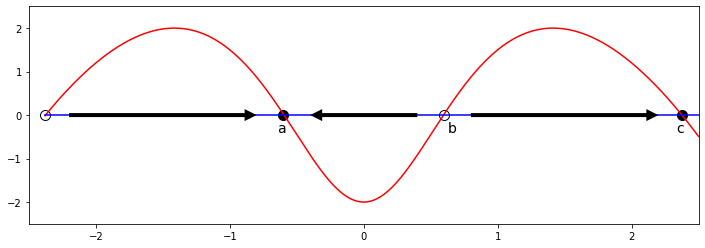

In [18]:
#define figure properties for upcoming plots:
fig = plt.figure(figsize=(12,4))

X = np.linspace(-2.38,2.5,1000)
y = []

for n,x in enumerate(X):
    # just any curve that repeatedly crosses the null-line
    y.append(2-(2 - x**2)**2 / (1 + x**2))

plt.text(-0.65, -0.4, 'a', fontsize=14)
plt.text(0.63, -0.4, 'b', fontsize=14)
plt.text(2.33, -0.4, 'c', fontsize=14)
plt.plot(-2.38, 0 ,color = 'k',markerfacecolor='white', marker='o', markersize = 10.0)
plt.plot(-0.6, 0 ,color = 'k',marker='o', markersize = 10.0)
plt.plot(0.6,0,color = 'k',   markerfacecolor='white', marker='o', markersize = 10.0)
plt.plot(2.38, 0 ,color = 'k',marker='o', markersize = 10.0)
plt.annotate('', xy=(-0.8, 0), xytext=(-2.2, 0),arrowprops=dict(facecolor='k',lw=0),)
plt.annotate('', xy=(-0.4, 0), xytext=(0.4, 0),arrowprops=dict(facecolor='k',lw=0),)
plt.annotate('', xy=(2.2, 0), xytext=(0.8, 0),arrowprops=dict(facecolor='k',lw=0),)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks()
plt.plot(X, y, 'r-')
plt.plot(X, [0]*len(X), 'b-')

Calculating the Bifurcation Curves
As mentioned here, the critical condition for the occurence of a bifurcation is that the line  x(1−x/k)  intersects the curve  x/(1+x2)  tangentially. This is found by taking the derivatives of both, in this case:

(5)  ddx[r(1−xk)]=ddx[x1+x2] 
and looking at them at the equilibrium points, which are given by

(6)  r(1−xk)=x1+x2 
After differentiation, (5) reduces to

(7)  −rk=1−x2(1+x2)2 
Substituting this expression for  rk  into (6) allows to express  r  solely in terms of  x . This gives

(8)  r=2x3(1+x2)2 
Then inserting (8) into (7) yields

(9)  k=2x3x2−1 
Together, (8) and (9) define the bifurcation curves. This is plotted below.

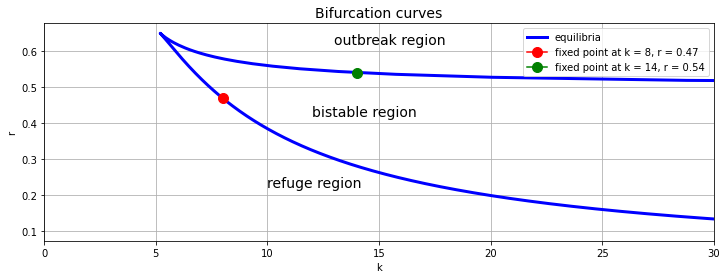

In [19]:
fig = plt.figure(figsize=(12,4))

X = np.linspace(1.0001,20,1000)

R = []
K = []
for x in X:
    R.append((2*x**3)/(1+x**2)**2)
    K.append(2*x**3/(x**2 - 1))

plt.plot(K, R, 'b-', label = 'equilibria', linewidth = 3)
plt.xlim(0, 30)
plt.text(10, 0.22, 'refuge region', fontsize=14)
plt.text(12, 0.42, 'bistable region', fontsize=14)
plt.text(13, 0.62, 'outbreak region', fontsize=14)
plt.plot(8,0.47,color = 'r',marker='o', markersize = 10.0, label = 'fixed point at k = 8, r = 0.47')
plt.plot(14,0.54,color = 'g',marker='o', markersize = 10.0, label = 'fixed point at k = 14, r = 0.54')
plt.xlabel('k')
plt.ylabel('r')
plt.title('Bifurcation curves', fontsize=14)
plt.grid()
plt.legend(loc='best')


The outbreak
The behavior of the spruce budworm population can be regarded as the one of a slow-fast system. Slowly increasing the growth rate of the population drives the system towards a tipping point, at which a critical transition takes place. The population size "explodes", an outbreak occurs.

Text(0.5, 1.0, 'The insect outbreak')

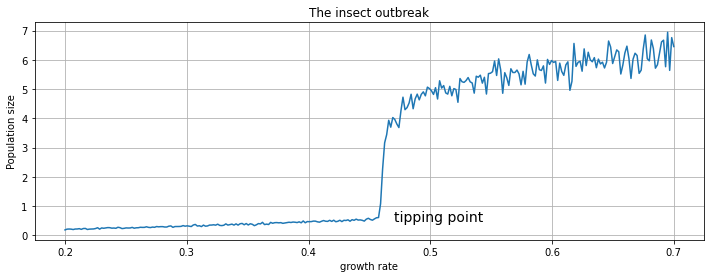

In [21]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#parameters
R = np.linspace(0.2, 0.7, 300)
p = 2    # the exponent
K = 8.   # carrying capacity

# a small random noise is added to make the system appear more realistically
# determine strength of noise
sigma = 0.05

# define the system in a function
def Sys(X, t=0):
    return np.array([r * X[0] * (1 - X[0]/K) - (X[0]**p / (1 + X[0]**p))])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 100,  1000)
# initial value
Sys0 = np.array([10])

# prepare plots
fig = plt.figure(figsize=(12,4))
plt.subplot(1,1,1)

XX = []

# loop through various r values
for r in R:
    # integrate system
    X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
    #generate noise, sigma * x * dW
    noise = sigma * np.random.normal(0, 1, 1000)
    # transform x and y, and add noise
    x = X.T + noise*X.T
    # plot
    XX.append(x[0][-1])
    #plt.plot(x[0], label = 'a = %0.1f' % a)
    # increment r

# determine plotting specifics
plt.plot(R, XX)
plt.grid()
plt.text(0.47, 0.5, 'tipping point', fontsize=14)
plt.xlabel('growth rate')
plt.ylabel('Population size')
plt.title('The insect outbreak')